# ТВиМС Задания 2 и 3

## Вариант 14

***

In [42]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed

In [43]:
plt.rcParams['figure.figsize'] = [12, 8]

In [44]:
a = 0
b = math.pi / 4

In [45]:
def get_x():
    return a + random.random()*(b-a)

def y_func(x):
    return math.tan(x)

def get_y():
    return y_func(get_x())

In [46]:
def generate_varseries(n):
    ys = []

    for i in range(n):
        ys.append(get_y())

    ys.sort()
    return ys

***

## Аналитическое расчеты:

![title](imgs/img2.jpg)

***

## Задание 1:

In [47]:
def Fy_deduced(y):
    if y < 0:
        return 0
    elif y > 1:
        return 1
    else:
        return 4 / math.pi * math.atan(y)

def fy_deduced(y):
    if y < 0 or y > 1:
        return 0
    else:
        return 4 / (math.pi * (1 + y**2))

In [48]:
def histogram_data_alpha(a, b, vs, group_num, normalize='nope'):
    """Return data needed for type 1 histogram
    as a list of tuples each being:
    (a bin's left bound, a bin's occurrences count)
    
    Each bin's interval has its left bound included
    and right excluded, e.g. [0, 1), [1, 2), [3, 4), ...
    """
    group_width = (b - a) / group_num
    hdata = [[a + i*group_width, 0] for i in range(group_num + 1)]


    index = 0
    for v in vs:
        if index == group_num-1 or v < hdata[index+1][0]:
            hdata[index][1] += 1
        else:
            index += 1
            hdata[index][1] += 1

    if normalize == 'simple':
        for interval in hdata[:-1]:
            interval[1] /= len(vs)
    elif normalize == 'for f(y)':
        square = 0
        for interval in hdata[:-1]:
            square += group_width*interval[1]

        for interval in hdata[:-1]:
            interval[1] /= square

    hdata[-1][1] = hdata[-2][1]

    return hdata

In [49]:
def plot_histogram_alpha_and_polygon_and_fy(a, b, n, group_num, normalize='nope'):
    vs = generate_varseries(n)

    hdata = histogram_data_alpha(a, b, vs, group_num, normalize=normalize)
    ps = [(hdata[i][0] + hdata[i+1][0]) / 2 for i in range(len(hdata) - 1)]

    # plotting histogram using step:
    plt.step([hd[0] for hd in hdata],
             [hd[1] for hd in hdata],
             where='post')
    
    # plotting polygon:
    plt.scatter(ps,
                [hd[1] for hd in hdata[:-1]])
    plt.plot(ps,
             [hd[1] for hd in hdata[:-1]],
             label='полигон распределения')

    # plotting histogram using hist:
    hist_params = {'bins': group_num,
                   'color': 'red',
                   'zorder': -1,
                   'alpha': 0.2}

    if normalize == 'nope':
        plt.hist(vs, **hist_params)
    elif normalize == 'simple':
        plt.hist(vs, **{**hist_params, 'weights': [1/len(vs)]*len(vs)})
    elif normalize == 'for f(y)':
        plt.hist(vs, **{**hist_params, 'density': 1})

    # plotting analytic:
    if normalize == 'for f(y)':
        xs = np.linspace(a, b, 1000)
        plt.plot(xs,
                 [fy_deduced(x) for x in xs],
                 label='аналитическая функция плотности')

    plt.legend()
    plt.xlabel("")
    plt.show()

## Гистограмма. Равноинтервальный метод. Полигон распределения. Аналитическая функция плотности.

#### Interactive (not working on github):

In [50]:
interact(plot_histogram_alpha_and_polygon_and_fy, a=fixed(0), b=fixed(1), n=(1, 1000000), group_num=(1, 32), normalize=['nope', 'simple', 'for f(y)'])

interactive(children=(IntSlider(value=500000, description='n', max=1000000, min=1), IntSlider(value=16, descri…

<function __main__.plot_histogram_alpha_and_polygon_and_fy(a, b, n, group_num, normalize='nope')>

#### Demo:

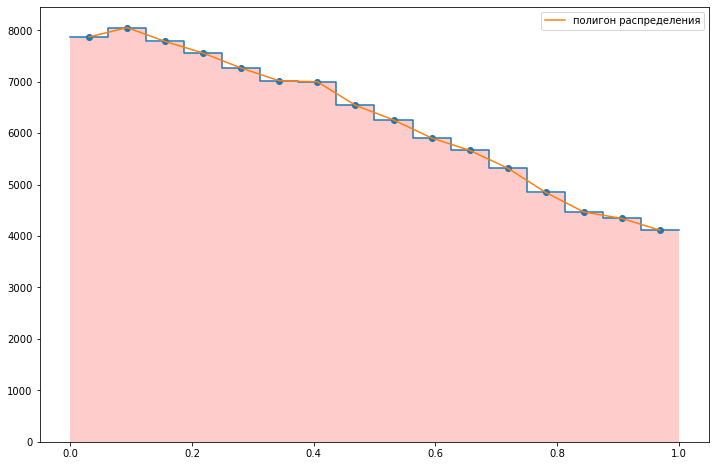

In [51]:
plot_histogram_alpha_and_polygon_and_fy(0, 1, 100000, 16, normalize='nope')

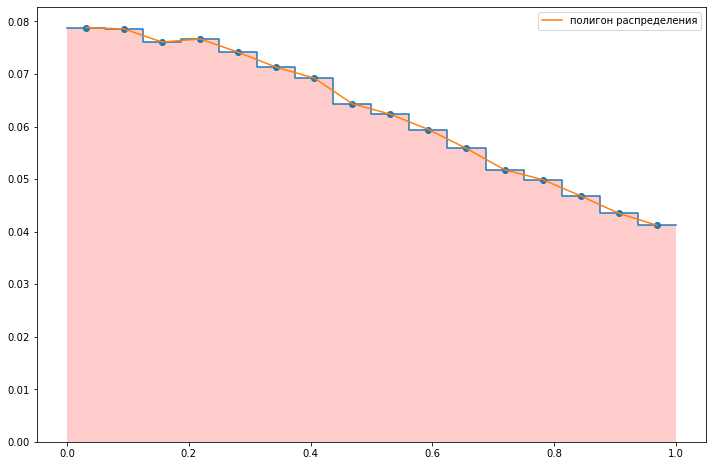

In [52]:
plot_histogram_alpha_and_polygon_and_fy(0, 1, 100000, 16, normalize='simple')

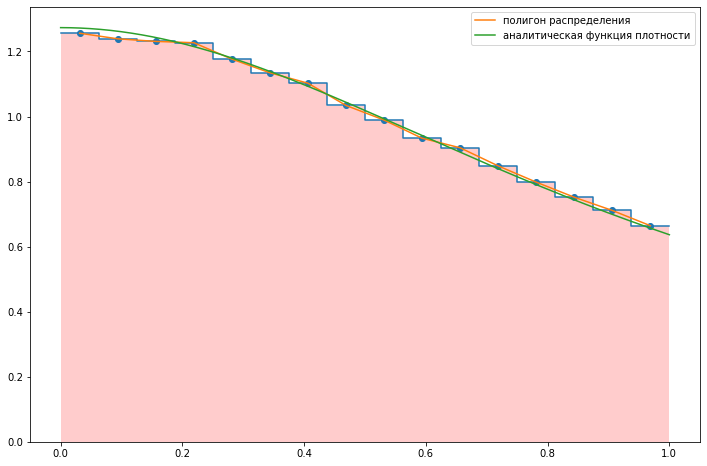

In [53]:
plot_histogram_alpha_and_polygon_and_fy(0, 1, 100000, 16, normalize='for f(y)')

## Эмпирическая функция распределения по сгруппированным данным.

In [54]:
def get_empirical_data_alpha(a, b, vs, group_num):
    hdata = histogram_data_alpha(a, b, vs, group_num, normalize='simple')
    hdata = [[a, 0]] + hdata

    for i in range(1, len(hdata)):
        hdata[i][1] += hdata[i-1][1]

    return hdata

In [55]:
def plot_empirical_alpha(a, b, n, group_num, analytic_func):
    vs = generate_varseries(n)
    
    empirical_data = get_empirical_data_alpha(a, b, vs, group_num)

    # I'm still struggling a bit to understand
    # what is going on with the indexes below

    # plotting empirical:
    plt.scatter([ed[0] for ed in empirical_data[1:]],
                [ed[1] for ed in empirical_data[:-1]])
    plt.plot([ed[0] for ed in empirical_data[1:]],
             [ed[1] for ed in empirical_data[:-1]],
             label='эмпирическая функция распределения')
    
    # plotting analytic:
    xs = np.linspace(a, b, 1000)
    plt.plot(xs,
             [analytic_func(x) for x in xs],
             label='аналитическая функция распределения')

    # plotting cumulative hist:
    hist_params = {'bins': group_num,
                   'color': 'red',
                   'zorder': -1,
                   'alpha': 0.2,
                   'cumulative': True,
                   'density': True}
    plt.hist(vs, **hist_params)

    plt.legend()
    plt.show()

#### Interactive (not working on github):

In [56]:
interact(plot_empirical_alpha, a=fixed(0), b=fixed(1), n=(1, 1000000), group_num=(1, 32), analytic_func=fixed(Fy_deduced))

interactive(children=(IntSlider(value=500000, description='n', max=1000000, min=1), IntSlider(value=16, descri…

<function __main__.plot_empirical_alpha(a, b, n, group_num, analytic_func)>

#### Demo:

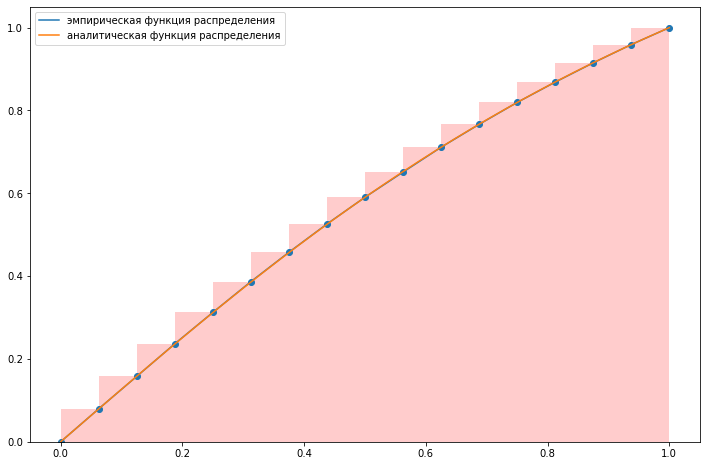

In [57]:
plot_empirical_alpha(0, 1, 100000, 16, Fy_deduced)

***

## Задание 2:

In [58]:
def histogram_data_beta(a, b, vs, group_num):
    """Return data needed for type 2 histogram
    as a list of tuples each being:
    (a bin's left bound, a bin's occurrences count)
    
    Each bin's interval has its left bound included
    and right excluded, e.g. [0, 1), [1, 2), [3, 4), ...

    Примечание: работает только для НСВ с почти-лишь-только-один-раз-встречающимися
    элементами вариационного ряда (здесь вар-ряд = выборка из-за *высокой степени
    уникальности* элементов выборки, т.е. элементы списка 'vs' могут повторяться,
    но это очень маловероятно, если число b-a неотрицательного порядка/
    однозначного отрицательного порядка - порядок условно от -9 до 10+)
    """
    bin_capacity = len(vs) // group_num

    hdata = [[a, 0]]
    for i in range(len(vs)):
        hdata[-1][1] += 1
        last_bin_empty = False

        # if the last bin is full:
        if hdata[-1][1] == bin_capacity:
            # calculate its right bound:
            if i == len(vs) - 1:
                right_bound = b
            else:
                right_bound = (vs[i] + vs[i+1]) / 2

            # add a new empty bin:
            hdata.append([right_bound, 0])
            last_bin_empty = True

    if last_bin_empty:
        del hdata[-1]

    square = 0
    for i in range(len(hdata) - 1):
        # calculating local density and updating square:
        hdata[i][1] = hdata[i][1] / (hdata[i+1][0] - hdata[i][0])
        square += hdata[i][1] * (hdata[i+1][0] - hdata[i][0])
    
    hdata[-1][1] = hdata[-1][1] / (b - hdata[-1][0])
    square += hdata[-1][1] * (b - hdata[-1][0])

    for hd in hdata:
        hd[1] /= square

    hdata.append([b, hdata[-1][1]])
            
    return hdata

In [59]:
def plot_histogram_beta_and_polygon_and_fy(a, b, n, group_num):
    vs = generate_varseries(n)
    hdata = histogram_data_beta(a, b, vs, group_num)
    ps = [(hdata[i][0] + hdata[i+1][0]) / 2 for i in range(len(hdata) - 1)]

    # plotting histogram:
    plt.step([hd[0] for hd in hdata],
             [hd[1] for hd in hdata],
             where='post')
    
    # plotting polygon:
    plt.scatter(ps,
                [hd[1] for hd in hdata[:-1]])
    plt.plot(ps,
             [hd[1] for hd in hdata[:-1]],
             label='полигон распределения')

    # plotting analytic:
    xs = np.linspace(a, b, 1000)
    plt.plot(xs,
             [fy_deduced(x) for x in xs],
             label='аналитическая функция плотности')

    plt.legend()
    plt.show()

#### Interactive (not working on github):

In [60]:
interact(plot_histogram_beta_and_polygon_and_fy, a=fixed(0), b=fixed(1), n=(1, 1000000), group_num=(1, 32))

interactive(children=(IntSlider(value=500000, description='n', max=1000000, min=1), IntSlider(value=16, descri…

<function __main__.plot_histogram_beta_and_polygon_and_fy(a, b, n, group_num)>

#### Demo:

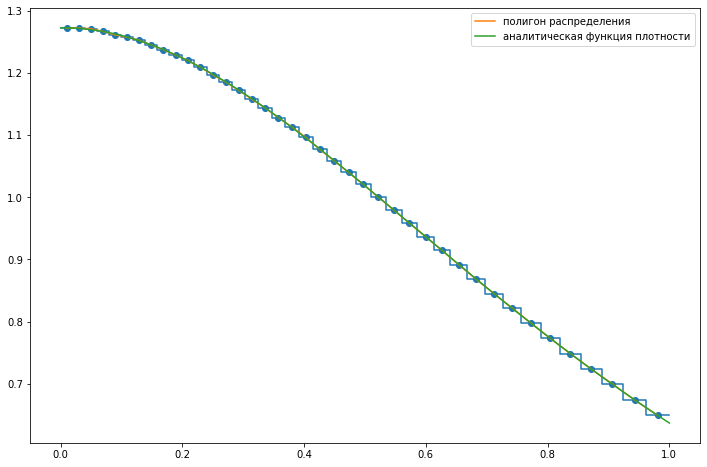

In [22]:
plot_histogram_beta_and_polygon_and_fy(0, 1, 100_000_000, 40)